<a href="https://colab.research.google.com/github/suakow/COVID-19_forecast-ML_Midterm_2019/blob/master/COVID_2019_ML_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

https://github.com/CSSEGISandData/COVID-19

In [0]:
! pip install ipython-autotime

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 8.12 s


In [0]:
! git clone https://github.com/CSSEGISandData/COVID-19.git

fatal: destination path 'COVID-19' already exists and is not an empty directory.
time: 5.88 s


In [0]:
import pandas as pd

covid_confirm_df = pd.read_csv('/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
covid_death_df = pd.read_csv('/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
covid_recover_df = pd.read_csv('/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

time: 26.8 ms


In [0]:
covid_confirm_df.head()

Province/State Country/Region      Lat  ...  3/11/20  3/12/20  3/13/20
0            NaN       Thailand  15.0000  ...       59       70       75
1            NaN          Japan  36.0000  ...      639      639      701
2            NaN      Singapore   1.2833  ...      178      178      200
3            NaN          Nepal  28.1667  ...        1        1        1
4            NaN       Malaysia   2.5000  ...      149      149      197

[5 rows x 56 columns]

time: 86.4 ms


In [0]:
covid_death_df.head()

Province/State Country/Region      Lat  ...  3/11/20  3/12/20  3/13/20
0            NaN       Thailand  15.0000  ...        1        1        1
1            NaN          Japan  36.0000  ...       15       16       19
2            NaN      Singapore   1.2833  ...        0        0        0
3            NaN          Nepal  28.1667  ...        0        0        0
4            NaN       Malaysia   2.5000  ...        0        0        0

[5 rows x 56 columns]

time: 83.5 ms


In [0]:
covid_recover_df.head()

Province/State Country/Region      Lat  ...  3/11/20  3/12/20  3/13/20
0            NaN       Thailand  15.0000  ...       34       34       35
1            NaN          Japan  36.0000  ...      118      118      118
2            NaN      Singapore   1.2833  ...       96       96       97
3            NaN          Nepal  28.1667  ...        1        1        1
4            NaN       Malaysia   2.5000  ...       26       26       26

[5 rows x 56 columns]

time: 72.1 ms


Check missing value

In [0]:
covid_confirm_df.isnull().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
1/22/20           False
1/23/20           False
1/24/20           False
1/25/20           False
1/26/20           False
1/27/20           False
1/28/20           False
1/29/20           False
1/30/20           False
1/31/20           False
2/1/20            False
2/2/20            False
2/3/20            False
2/4/20            False
2/5/20            False
2/6/20            False
2/7/20            False
2/8/20            False
2/9/20            False
2/10/20           False
2/11/20           False
2/12/20           False
2/13/20           False
2/14/20           False
2/15/20           False
2/16/20           False
2/17/20           False
2/18/20           False
2/19/20           False
2/20/20           False
2/21/20           False
2/22/20           False
2/23/20           False
2/24/20           False
2/25/20           False
2/26/20           False
2/27/20           False
2/28/20         

time: 6.92 ms


# Exploration

Step 1 : Clean data

In [0]:
covid_confirm_df['Province/State'].fillna('',inplace=True)
covid_death_df['Province/State'].fillna('',inplace=True)
covid_recover_df['Province/State'].fillna('',inplace=True)

time: 4.92 ms


In [0]:
covid_confirm_df.fillna(0, inplace=True)
covid_death_df.fillna(0, inplace=True)
covid_recover_df.fillna(0, inplace=True)

time: 7.75 ms


In [0]:
covid_confirm_df.isnull().any()

Province/State    False
Country/Region    False
Lat               False
Long              False
1/22/20           False
1/23/20           False
1/24/20           False
1/25/20           False
1/26/20           False
1/27/20           False
1/28/20           False
1/29/20           False
1/30/20           False
1/31/20           False
2/1/20            False
2/2/20            False
2/3/20            False
2/4/20            False
2/5/20            False
2/6/20            False
2/7/20            False
2/8/20            False
2/9/20            False
2/10/20           False
2/11/20           False
2/12/20           False
2/13/20           False
2/14/20           False
2/15/20           False
2/16/20           False
2/17/20           False
2/18/20           False
2/19/20           False
2/20/20           False
2/21/20           False
2/22/20           False
2/23/20           False
2/24/20           False
2/25/20           False
2/26/20           False
2/27/20           False
2/28/20         

time: 6.98 ms


In [0]:
covid_confirm_df['Place'] = covid_confirm_df['Province/State'] + ' ' + covid_confirm_df['Country/Region']
covid_confirm_df['Place'] = covid_confirm_df['Place'].apply(lambda _ : _.strip())

covid_death_df['Place'] = covid_death_df['Province/State'] + ' ' + covid_death_df['Country/Region']
covid_death_df['Place'] = covid_death_df['Place'].apply(lambda _ : _.strip())

covid_recover_df['Place'] = covid_recover_df['Province/State'] + ' ' + covid_recover_df['Country/Region']
covid_recover_df['Place'] = covid_recover_df['Place'].apply(lambda _ : _.strip())

time: 18.7 ms


In [0]:
covid_confirm_df['Place']

0                   Thailand
1                      Japan
2                  Singapore
3                      Nepal
4                   Malaysia
               ...          
416                    Aruba
417    Grand Princess Canada
418                    Kenya
419      Antigua and Barbuda
420               Alabama US
Name: Place, Length: 421, dtype: object

time: 5.98 ms


In [0]:
covid_confirm_time_df = covid_confirm_df[covid_confirm_df.columns[4:-1]].T
covid_confirm_time_df.columns = covid_confirm_df['Place']
covid_confirm_time_df.index.set_names('Date', inplace=True)

covid_death_time_df = covid_death_df[covid_death_df.columns[4:-1]].T
covid_death_time_df.columns = covid_death_df['Place']
covid_death_time_df.index.set_names('Date', inplace=True)

covid_recover_time_df = covid_recover_df[covid_recover_df.columns[4:-1]].T
covid_recover_time_df.columns = covid_recover_df['Place']
covid_recover_time_df.index.set_names('Date', inplace=True)

time: 20.2 ms


In [0]:
covid_confirm_time_df.columns

Index(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia',
       'British Columbia Canada', 'New South Wales Australia',
       'Victoria Australia', 'Queensland Australia', 'Cambodia',
       ...
       'Manitoba Canada', 'Saskatchewan Canada', 'Ethiopia', 'Sudan', 'Guinea',
       'Aruba', 'Grand Princess Canada', 'Kenya', 'Antigua and Barbuda',
       'Alabama US'],
      dtype='object', name='Place', length=421)

time: 3.75 ms


In [0]:
covid_confirm_time_df.shape

(52, 842)

time: 4.64 ms


## [Confirm Case] All China

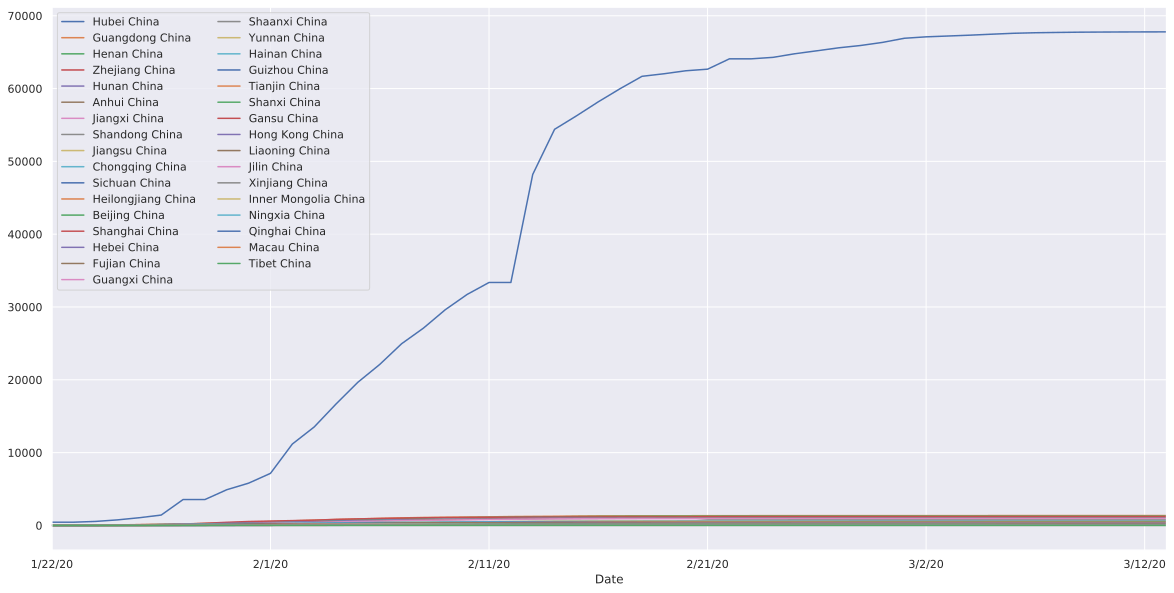

time: 454 ms


In [0]:
%config InlineBackend.figure_format = 'svg'

import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})

plot = covid_confirm_time_df[[ _ for _ in covid_confirm_time_df.columns if 'China' in _ and '|N' not in _ ]].plot()
plot.legend(loc='upper left', ncol=2)

## [Confirm Case]All China (Except Hubei)

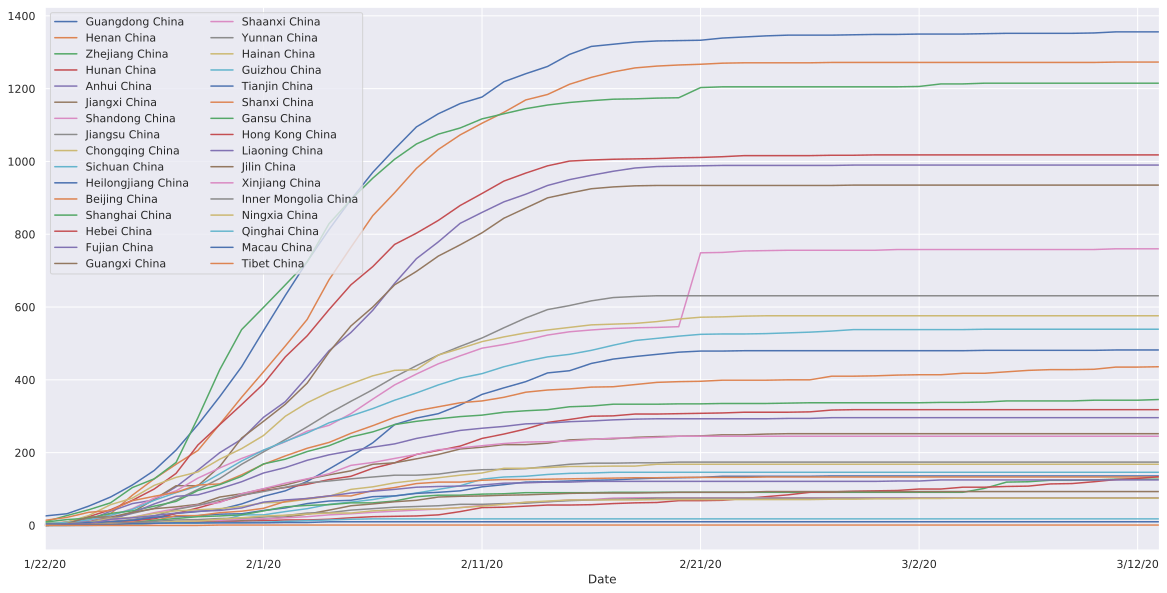

time: 436 ms


In [0]:
sns.set(rc={'figure.figsize':(20, 10)})

plot = covid_confirm_time_df[[ _ for _ in covid_confirm_time_df.columns if 'China' in _ and '|N' not in _ and 'Hubei' not in _ ]].plot()
plot.legend(loc='upper left', ncol=2)

## [Confirm Case] Other Country

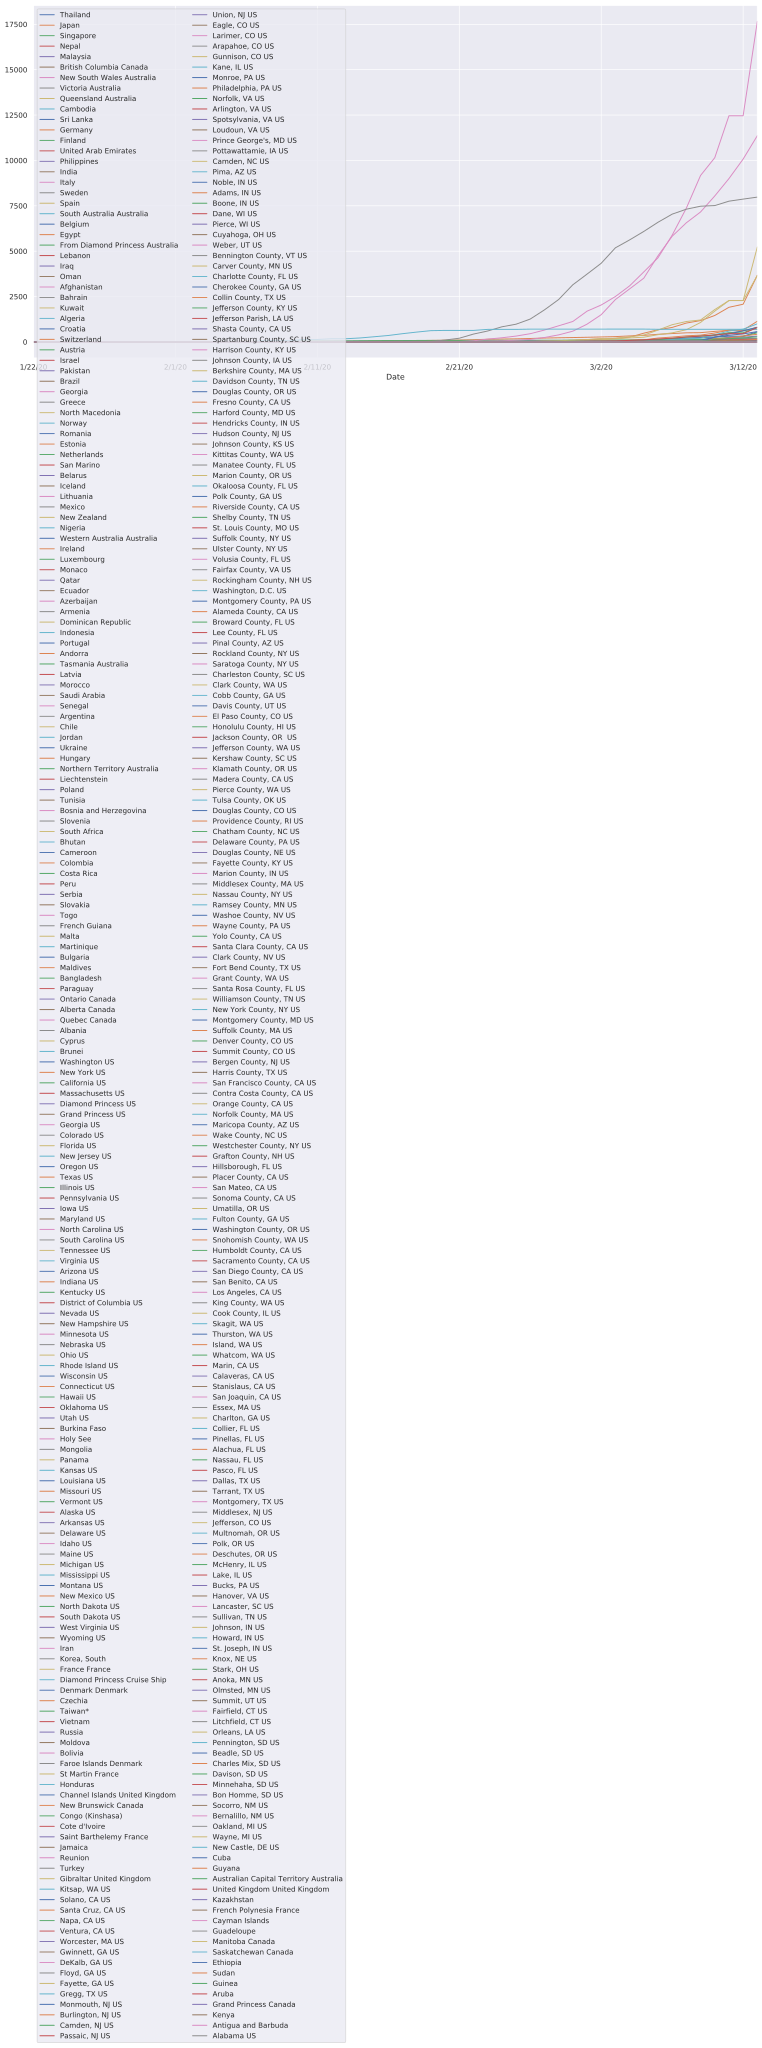

time: 5.62 s


In [0]:
sns.set(rc={'figure.figsize':(20, 10)})

plot = covid_confirm_time_df[[ _ for _ in covid_confirm_time_df.columns if 'China' not in _ and '|N' not in _ ]].plot()
plot.legend(loc='upper left', ncol=2)

## Normalise Data

In [0]:
for _ in covid_confirm_time_df.columns :
    covid_confirm_time_df[_+'|N'] = covid_confirm_time_df[_] / max(covid_confirm_time_df[_])

for _ in covid_death_time_df.columns :
    covid_death_time_df[_+'|N'] = covid_death_time_df[_] / max(covid_death_time_df[_])

for _ in covid_recover_time_df.columns :
    covid_recover_time_df[_+'|N'] = covid_recover_time_df[_] / max(covid_recover_time_df[_])

time: 1.02 s


### [Confirm Case] All China

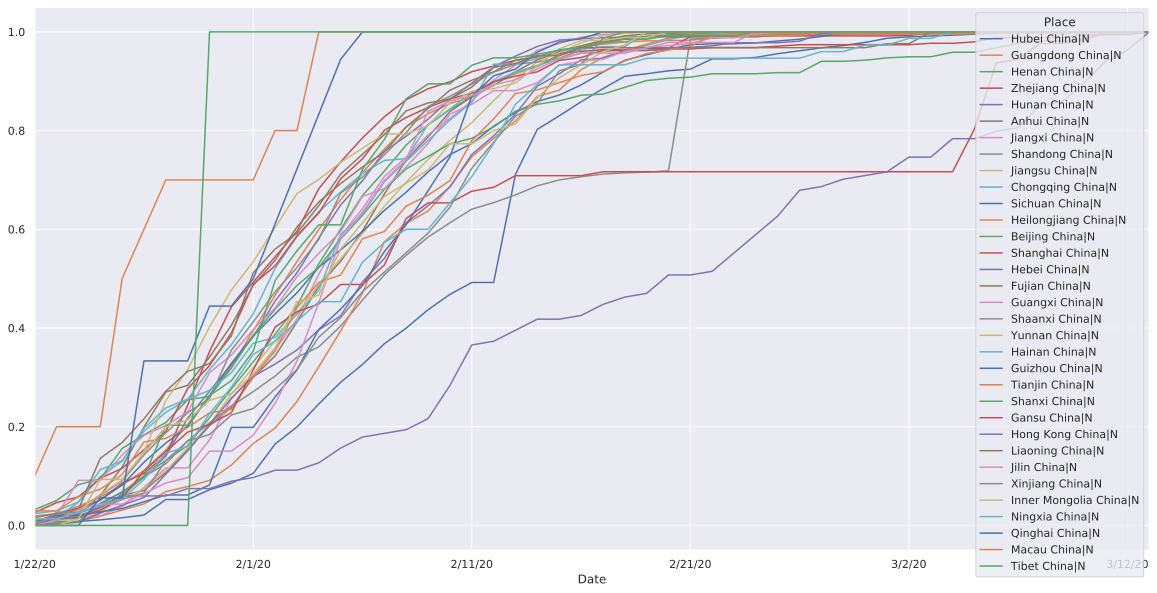

time: 389 ms


In [0]:
covid_confirm_time_df[[ _ for _ in covid_confirm_time_df.columns if '|N' in _ and 'China' in _ ]].plot()

### [Confirm Case] Other Country

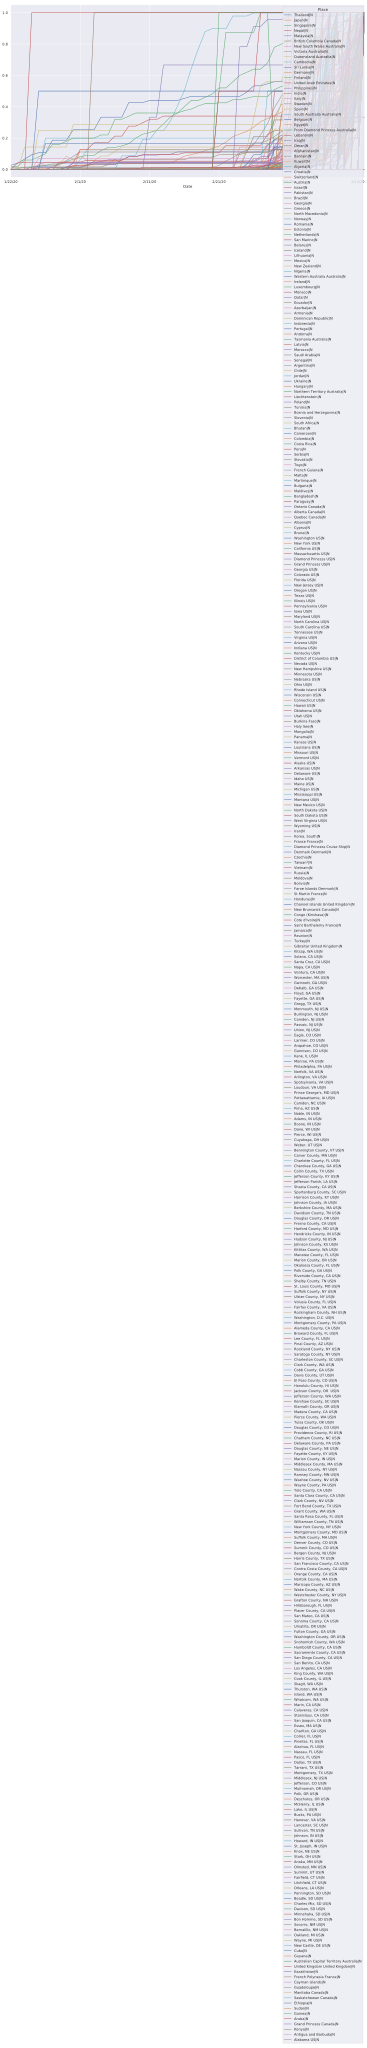

time: 5.84 s


In [0]:
covid_confirm_time_df[[ _ for _ in covid_confirm_time_df.columns if '|N' in _ and 'China' not in _ ]].plot()

### [Death] All China

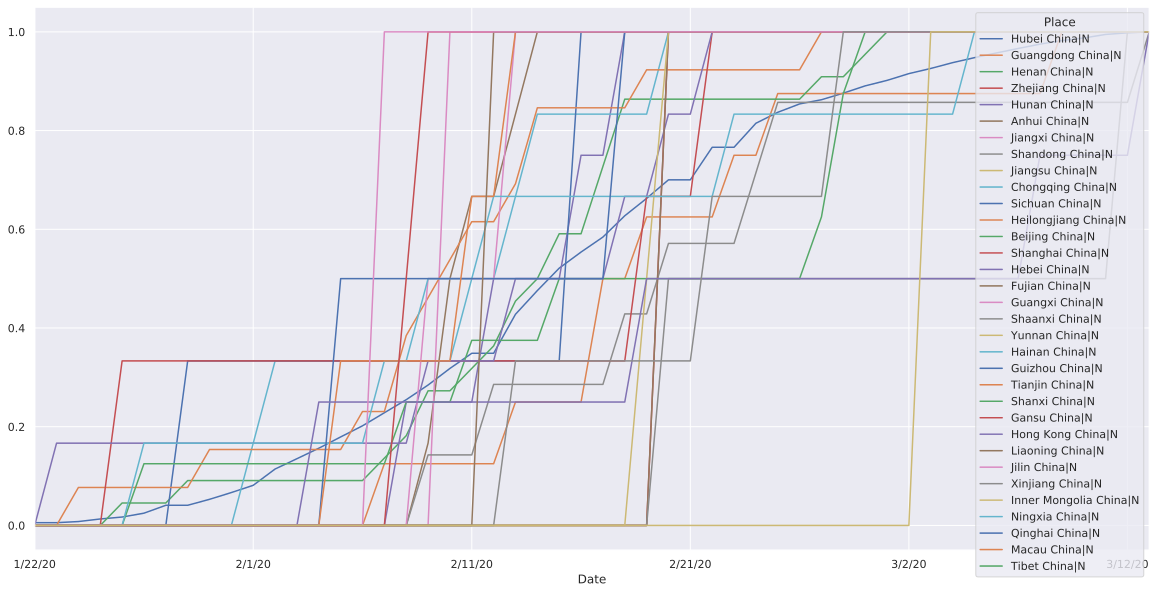

time: 520 ms


In [0]:
covid_death_time_df[[ _ for _ in covid_death_time_df.columns if '|N' in _ and 'China' in _ ]].plot()

### [Death] Other Country

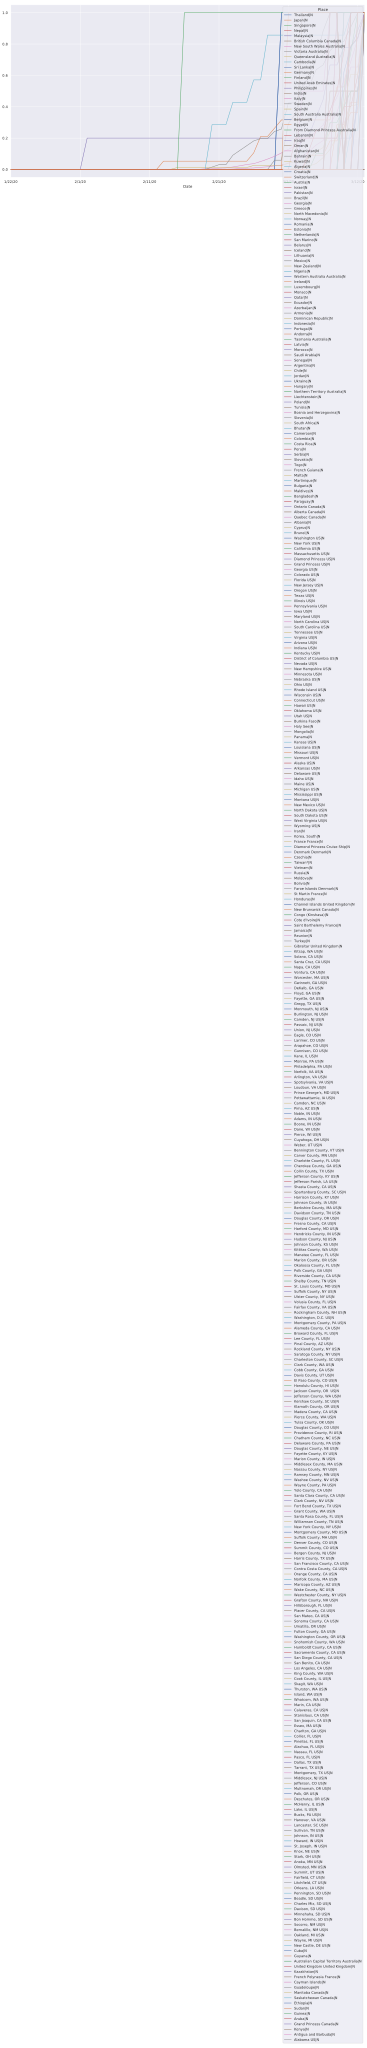

time: 5.75 s


In [0]:
covid_death_time_df[[ _ for _ in covid_death_time_df.columns if '|N' in _ and 'China' not in _ ]].plot()

### [Recover] All China

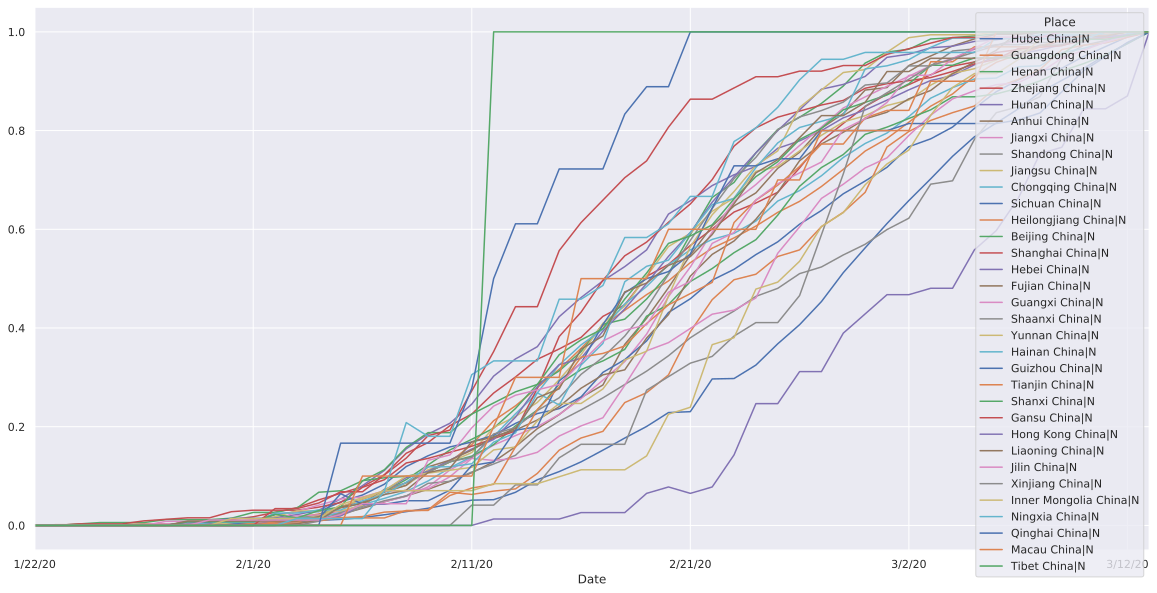

time: 554 ms


In [0]:
covid_recover_time_df[[ _ for _ in covid_recover_time_df.columns if '|N' in _ and 'China' in _ ]].plot()

### [Recover] Other Country

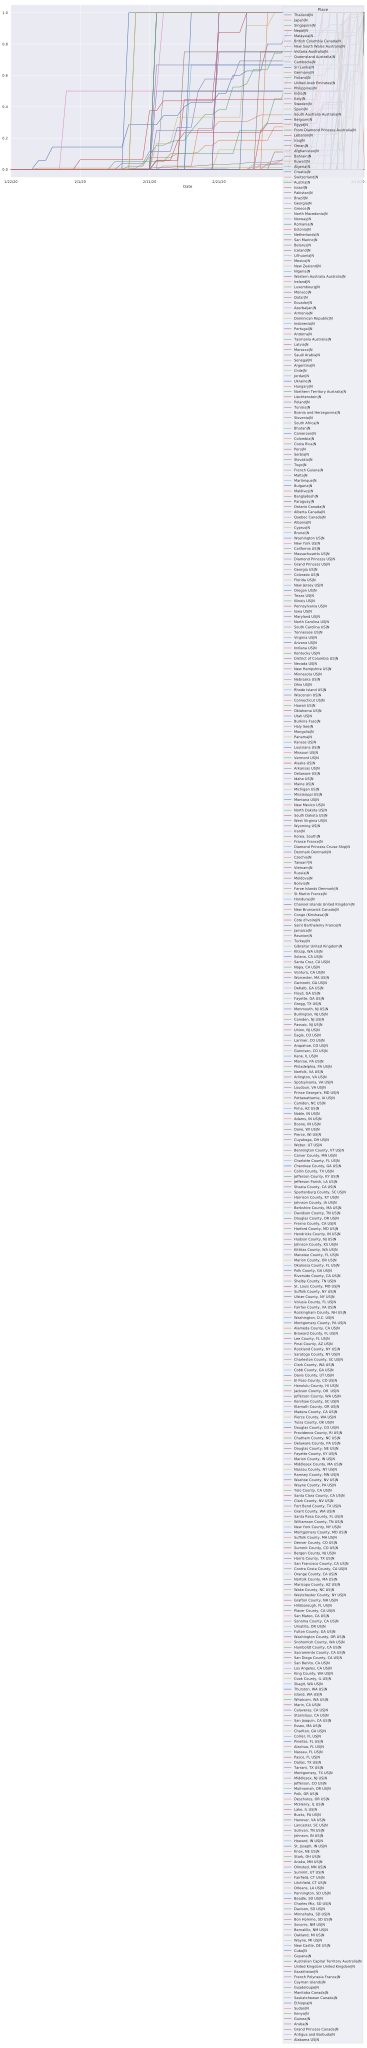

time: 5.98 s


In [0]:
covid_recover_time_df[[ _ for _ in covid_recover_time_df.columns if '|N' in _ and 'China' not in _ ]].plot()

### Test

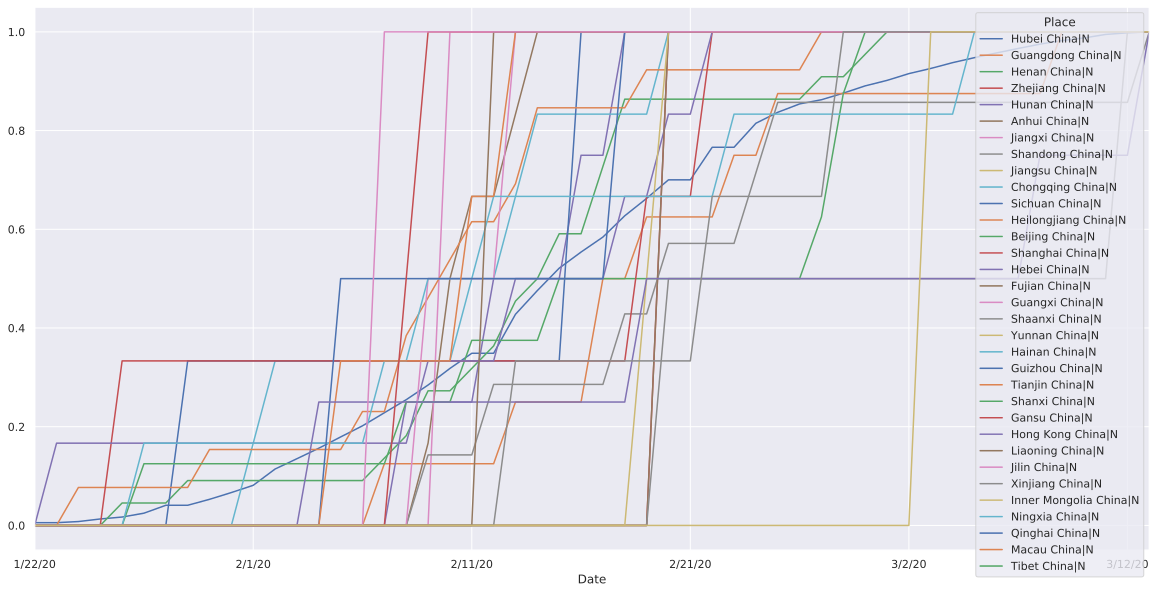

time: 476 ms


In [0]:
covid_death_time_df[[ _ for _ in covid_death_time_df.columns if '|N' in _ and 'China' in _ ]].plot()

Thailand

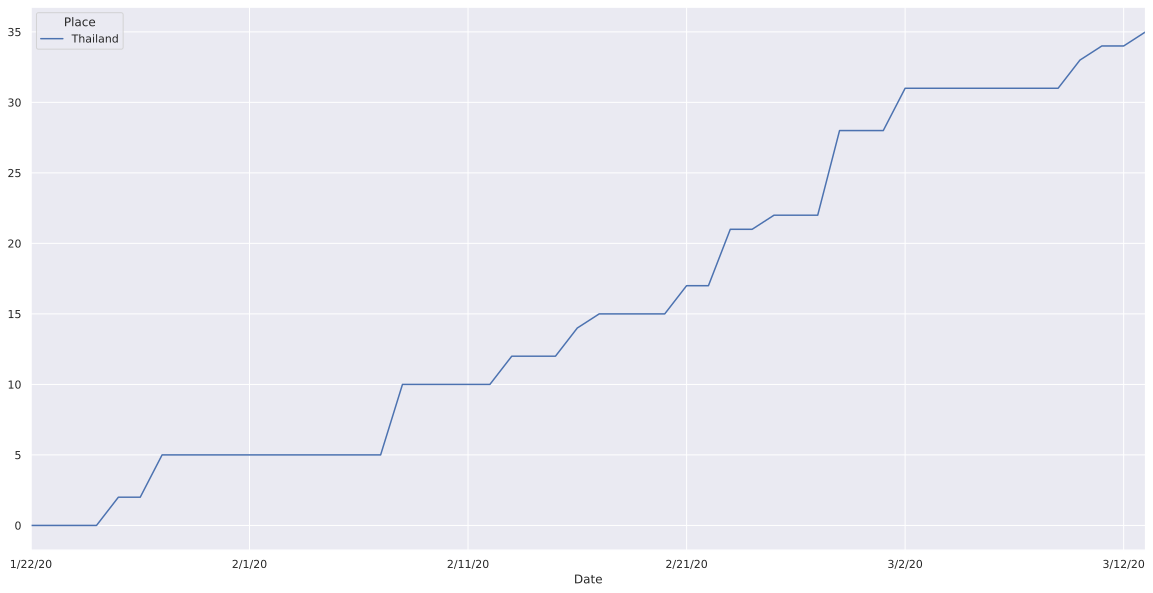

time: 155 ms


In [0]:
covid_recover_time_df[[ _ for _ in covid_recover_time_df.columns if '|N' not in _ and 'Thailand' in _ ]].plot()

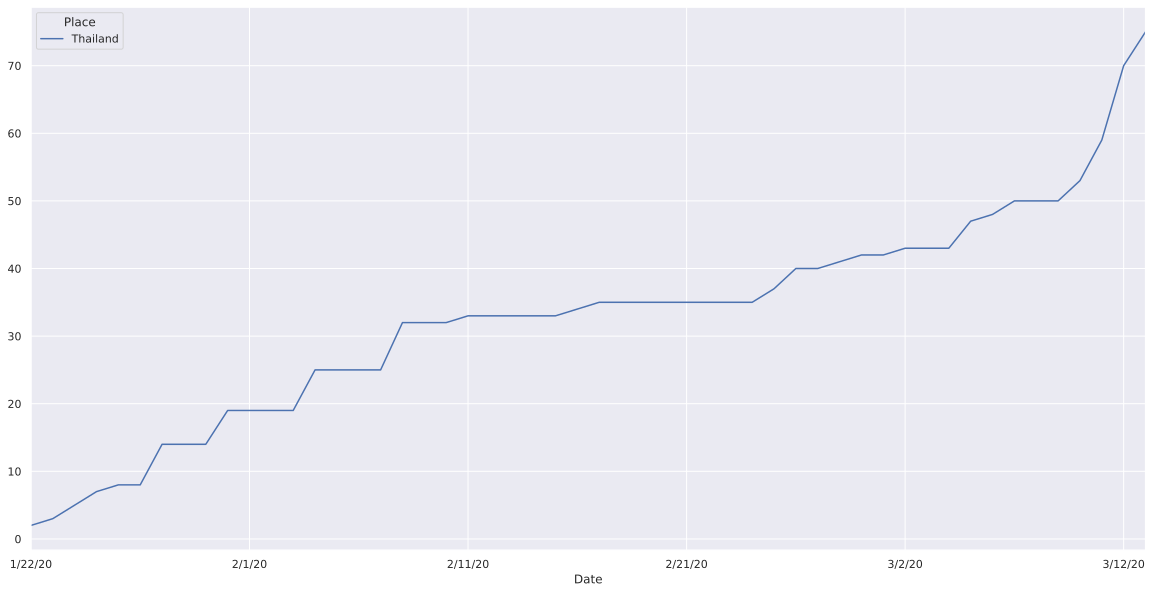

time: 173 ms


In [0]:
covid_confirm_time_df[[ _ for _ in covid_confirm_time_df.columns if '|N' not in _ and 'Thailand' in _ ]].plot()

# K-Mean Clustering

In [0]:
from sklearn.cluster import KMeans

X = covid_confirm_time_df[[ _ for _ in covid_confirm_time_df.columns if '|N' in _ and 'China' in _]].T

model = KMeans(n_clusters=4).fit(X)

time: 39.3 ms


In [0]:
model.cluster_centers_

array([[0.00911003, 0.01713828, 0.03378956, 0.0655247 , 0.09405346,
        0.13444202, 0.1805041 , 0.21905584, 0.27135697, 0.32598505,
        0.38838678, 0.44691706, 0.50715892, 0.56651959, 0.62861116,
        0.67967847, 0.72855445, 0.76901311, 0.80817969, 0.83946419,
        0.86283322, 0.89159738, 0.90880574, 0.92756019, 0.94487309,
        0.95701199, 0.96545924, 0.97158456, 0.97844862, 0.98263025,
        0.9852085 , 0.98704197, 0.98751283, 0.98965105, 0.99053684,
        0.99086688, 0.99271819, 0.99323011, 0.99343077, 0.99406013,
        0.99425284, 0.99588541, 0.99634413, 0.99670058, 0.99762969,
        0.99808841, 0.99831776, 0.99831776, 0.99875833, 0.9995963 ,
        0.9995963 , 1.        ],
       [0.        , 0.01492537, 0.01492537, 0.03731343, 0.05970149,
        0.05970149, 0.05970149, 0.07462687, 0.07462687, 0.08955224,
        0.09701493, 0.1119403 , 0.1119403 , 0.12686567, 0.15671642,
        0.17910448, 0.18656716, 0.19402985, 0.21641791, 0.28358209,
        0.36567

time: 6.04 ms


In [0]:
model.labels_

array([2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 1, 0, 0, 2, 0, 2, 3, 3, 3], dtype=int32)

time: 4.56 ms


# Curve fitting

In [0]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def func_sigmoid(x, l,c,m):
    return 1/(1+np.exp(-l*(x-c)))*m

time: 4.02 ms


Thailand Data

In [0]:
[ _ for _ in covid_confirm_time_df.columns if 'Hubei' in _ ]

['Hubei China', 'Hubei China|N']

time: 9.4 ms


In [0]:
country = 'Singapore'
confirm_data = np.array(covid_confirm_time_df[country])
recover_data = np.array(covid_recover_time_df[country])

t, cov = curve_fit(func_sigmoid, np.arange(len(confirm_data)), confirm_data, bounds=(0, [10, 100, 100000]))
t_recov, cov_recov = curve_fit(func_sigmoid, np.arange(len(recover_data)), recover_data, bounds=(0, [10, 100, 100000]))

time: 87.6 ms


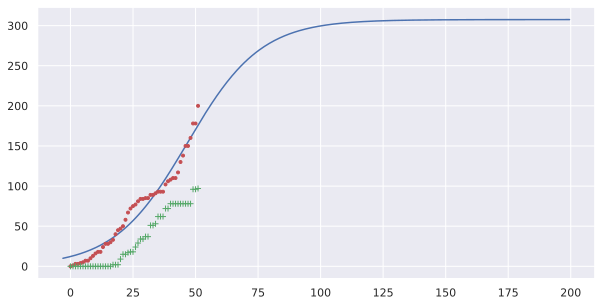

time: 250 ms


In [0]:
sns.set(rc={'figure.figsize':(10, 5)})
graph_range = np.arange(-3,200,0.5)

plt.plot(graph_range, func_sigmoid(graph_range, t[0], t[1], t[2]))
# plt.plot(graph_range, func_sigmoid(graph_range, t_recov[0], t_recov[1], t_recov[2]))
plt.plot(np.arange(len(confirm_data)), confirm_data, 'r.')
plt.plot(np.arange(len(recover_data)), recover_data, 'g+')

plt.show()

In [0]:
# country = 'Hubei China'
# confirm_data = np.array(covid_confirm_time_df[country])
# recover_data = np.array(covid_recover_time_df[country])

# t, cov = curve_fit(func_sigmoid, np.arange(len(confirm_data)), confirm_data, bounds=(0, [10, 100, 100000]))
# t_recov, cov_recov = curve_fit(func_sigmoid, np.arange(len(recover_data)), recover_data, bounds=(0, [10, 100, 100000]))

time: 25.2 ms


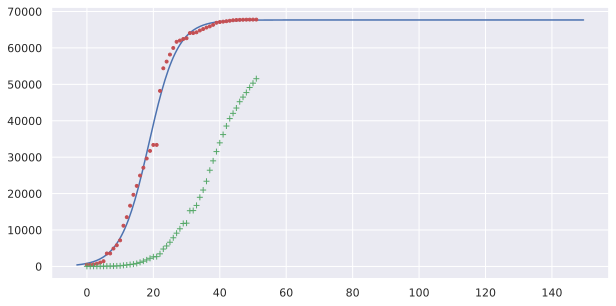

time: 241 ms


In [0]:
# sns.set(rc={'figure.figsize':(10, 5)})
# graph_range = np.arange(-3,150,0.5)

# plt.plot(graph_range, func_sigmoid(graph_range, t[0], t[1], t[2]))
# # plt.plot(graph_range, func_sigmoid(graph_range, t_recov[0], t_recov[1], t_recov[2]))
# plt.plot(np.arange(len(confirm_data)), confirm_data, 'r.')
# plt.plot(np.arange(len(recover_data)), recover_data, 'g+')

# plt.show()

Evaluation

In [0]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(confirm_data, np.array([func_sigmoid(_, t[0], t[1], t[2]) for _ in np.arange(len(confirm_data))]))

9.290918614549451

time: 5.31 ms


# Neural Network

In [0]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation='linear', input_shape=[1]))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='mse', metrics=['mae', 'mse'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
time: 69 ms


In [0]:
training = model.fit(np.arange(len(recover_data)), recover_data, epochs=500)

Train on 52 samples
Epoch 1/500
52/52 [==============================] - 0s 1ms/sample - loss: 1217.1921 - mean_absolute_error: 25.6215 - mean_squared_error: 1217.1921
Epoch 2/500
52/52 [==============================] - 0s 118us/sample - loss: 434.5110 - mean_absolute_error: 15.9277 - mean_squared_error: 434.5110
Epoch 3/500
52/52 [==============================] - 0s 105us/sample - loss: 223.4699 - mean_absolute_error: 13.0600 - mean_squared_error: 223.4699
Epoch 4/500
52/52 [==============================] - 0s 129us/sample - loss: 219.9020 - mean_absolute_error: 12.3517 - mean_squared_error: 219.9020
Epoch 5/500
52/52 [==============================] - 0s 137us/sample - loss: 274.6625 - mean_absolute_error: 14.0294 - mean_squared_error: 274.6625
Epoch 6/500
52/52 [==============================] - 0s 118us/sample - loss: 240.2958 - mean_absolute_error: 13.6120 - mean_squared_error: 240.2958
Epoch 7/500
52/52 [==============================] - 0s 111us/sample - loss: 216.9392 - mean

In [0]:
model.weights

[<tf.Variable 'dense_19/kernel:0' shape=(1, 1) dtype=float32>,
 <tf.Variable 'dense_19/bias:0' shape=(1,) dtype=float32>]

time: 4.2 ms


In [0]:
model.get_weights()

[array([[1.9663388]], dtype=float32), array([-8.582682], dtype=float32)]

time: 53.7 ms


In [0]:
predict_value = model.predict(np.arange(200)).flatten()

time: 15.8 ms


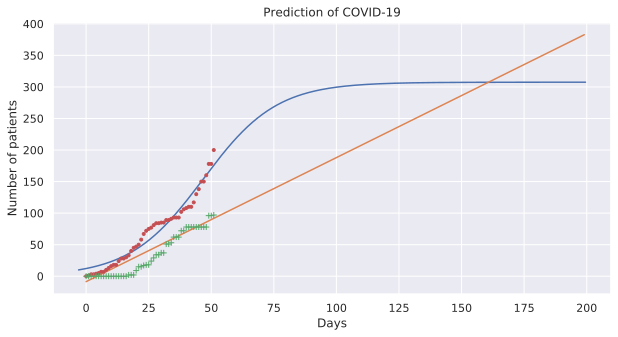

time: 284 ms


In [0]:
plt.plot(graph_range, func_sigmoid(graph_range, t[0], t[1], t[2]))
plt.plot(np.arange(200), predict_value)
plt.plot(np.arange(len(confirm_data)), confirm_data, 'r.')
plt.plot(np.arange(len(recover_data)), recover_data, 'g+')

plt.title('Prediction of COVID-19')
plt.xlabel('Days')
plt.ylabel('Number of patients')

plt.show()

In [0]:
[ _ for _ in np.arange(200) if (func_sigmoid(_, t[0], t[1], t[2]) - predict_value[_] < 1 and func_sigmoid(_, t[0], t[1], t[2]) - predict_value[_] > -1)] 

[161]

time: 6.22 ms


In [0]:
func_sigmoid(200, t[0], t[1], t[2])

307.5045885601136

time: 5.29 ms


In [0]:
predict_value[161]

307.99786

time: 5.89 ms
